In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
df = pd.read_csv('Life Expectancy Data.csv')

In [331]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# Storing continuous columns in list

In [332]:
import pandas as pd
import numpy as np

def is_continuous(series, unique_ratio_threshold=0.05, unique_count_threshold=20):
    """
    Check if a numeric column is continuous based on number of unique values and their ratio.

    Parameters
    ----------
    series : pd.Series
        The column to check.
    unique_ratio_threshold : float, optional (default=0.05)
        Minimum ratio of unique values to total rows to consider continuous.
    unique_count_threshold : int, optional (default=20)
        Minimum number of unique values required to consider continuous.

    Returns
    -------
    bool
        True if column is continuous, False otherwise.
    """

    # 1. Must be numeric
    if not pd.api.types.is_numeric_dtype(series):
        return False

    total_count = len(series)
    unique_count = series.nunique(dropna=True)
    unique_ratio = unique_count / total_count

    # 2. Must have enough distinct values (count) AND not behave like categorical (ratio)
    if unique_count > unique_count_threshold and unique_ratio > unique_ratio_threshold:
        return True
    else:
        return False


# ✅ Example usage:
# df = your DataFrame
continuous_cols = [col for col in df.columns if is_continuous(df[col])]
print("Continuous numeric columns:", continuous_cols)


Continuous numeric columns: ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ', 'Total expenditure', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [333]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [334]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# splitting the dataset

In [335]:
x = df[['Country', 'Year', 'Status',  'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
y = df['Life expectancy ']

In [336]:
from sklearn.model_selection import train_test_split

In [337]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

# Percentage of null values

In [338]:
for col in df.columns:
    na = (df[col].isnull().sum()/len(df[col])*100)
    print(col)
    print(na)
    print('---------------')

Country
0.0
---------------
Year
0.0
---------------
Status
0.0
---------------
Life expectancy 
0.3403675970047651
---------------
Adult Mortality
0.3403675970047651
---------------
infant deaths
0.0
---------------
Alcohol
6.603131381892443
---------------
percentage expenditure
0.0
---------------
Hepatitis B
18.82232811436351
---------------
Measles 
0.0
---------------
 BMI 
1.1572498298162015
---------------
under-five deaths 
0.0
---------------
Polio
0.6466984343090538
---------------
Total expenditure
7.6923076923076925
---------------
Diphtheria 
0.6466984343090538
---------------
 HIV/AIDS
0.0
---------------
GDP
15.248468345813478
---------------
Population
22.19196732471069
---------------
 thinness  1-19 years
1.1572498298162015
---------------
 thinness 5-9 years
1.1572498298162015
---------------
Income composition of resources
5.684138869979578
---------------
Schooling
5.547991831177672
---------------


# Imputing null values with median for columns which has less than 5 %

In [339]:
y_train.isnull().sum()

7

In [340]:
y_train = y_train.fillna(y_train.median())

In [341]:
y_test.isnull().sum()

3

In [342]:
y_test = y_test.fillna(y_train.median())

In [343]:
y_test.isnull().sum()

0

# Storing column names in scaling which has more than 5 % of null values

In [344]:
scaling = []
for col in x_train.select_dtypes(include='number'):
    na = (x_train[col].isnull().sum()/len(x_train[col])*100)
    if na <= 5:
        x_train[col] = x_train[col].fillna(x_train[col].median())
        x_test[col] = x_test[col].fillna(x_train[col].median())
    elif na > 5:
        scaling.append(col)
        
    

In [345]:
scaling

['Alcohol',
 'Hepatitis B',
 'Total expenditure',
 'GDP',
 'Population',
 'Income composition of resources',
 'Schooling']

# column transformer using pipeline for Knn imputation

In [346]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [347]:
high_null_pipe = Pipeline([
    ("knn", KNNImputer(n_neighbors=5)),
     ("scaler", StandardScaler())
])


preprocessor = ColumnTransformer([
    ("high_null_numeric", high_null_pipe, scaling),
   
],remainder='passthrough')

In [348]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('high_null_numeric',
                                 Pipeline(steps=[('knn', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Alcohol', 'Hepatitis B', 'Total expenditure',
                                  'GDP', 'Population',
                                  'Income composition of resources',
                                  'Schooling'])])

In [349]:
x_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1625,Mali,2008,Developing,278.0,55,0.57,102.141374,74.0,98,19.6,...,74.0,6.74,74.0,1.6,689.678423,14138216.0,9.2,9.0,0.360,5.8
2634,Tonga,2014,Developing,135.0,0,0.01,565.967217,8.0,0,74.8,...,82.0,5.18,8.0,0.1,4192.349758,15782.0,0.1,0.1,0.716,14.3
1772,Mozambique,2007,Developing,425.0,74,1.03,53.950279,75.0,267,19.3,...,75.0,5.25,75.0,14.1,422.146157,22188387.0,3.8,3.7,0.360,8.2
1238,Iraq,2011,Developing,144.0,32,0.17,285.119726,77.0,15,56.5,...,8.0,3.32,79.0,0.1,5854.614497,3172753.0,5.3,5.1,0.649,10.4
2362,Solomon Islands,2014,Developing,183.0,0,0.01,3.718439,88.0,0,49.7,...,94.0,5.50,88.0,0.1,29.652622,57554.0,1.1,1.2,0.512,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,Finland,2010,Developing,89.0,0,9.72,591.669141,NaN,5,6.2,...,99.0,9.50,99.0,0.1,4622.415160,5363352.0,0.9,0.8,0.874,16.8
1164,Hungary,2005,Developed,182.0,1,12.94,1317.083480,NaN,2,58.8,...,99.0,8.28,99.0,0.1,11161.724410,18765.0,2.0,2.0,0.795,15.0
500,Canada,2011,Developing,68.0,2,8.20,971.928038,7.0,803,64.7,...,87.0,1.82,87.0,0.1,5282.217600,3434278.0,0.5,0.5,0.903,15.9
421,Burundi,2010,Developing,33.0,23,4.16,31.141876,96.0,495,16.1,...,94.0,8.82,96.0,1.9,231.194326,876693.0,7.7,7.7,0.361,9.3


In [350]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [351]:
x_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1625,Mali,2008,Developing,278.0,55,0.57,102.141374,74.0,98,19.6,...,74.0,6.74,74.0,1.6,689.678423,14138216.0,9.2,9.0,0.360,5.8
2634,Tonga,2014,Developing,135.0,0,0.01,565.967217,8.0,0,74.8,...,82.0,5.18,8.0,0.1,4192.349758,15782.0,0.1,0.1,0.716,14.3
1772,Mozambique,2007,Developing,425.0,74,1.03,53.950279,75.0,267,19.3,...,75.0,5.25,75.0,14.1,422.146157,22188387.0,3.8,3.7,0.360,8.2
1238,Iraq,2011,Developing,144.0,32,0.17,285.119726,77.0,15,56.5,...,8.0,3.32,79.0,0.1,5854.614497,3172753.0,5.3,5.1,0.649,10.4
2362,Solomon Islands,2014,Developing,183.0,0,0.01,3.718439,88.0,0,49.7,...,94.0,5.50,88.0,0.1,29.652622,57554.0,1.1,1.2,0.512,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,Finland,2010,Developing,89.0,0,9.72,591.669141,NaN,5,6.2,...,99.0,9.50,99.0,0.1,4622.415160,5363352.0,0.9,0.8,0.874,16.8
1164,Hungary,2005,Developed,182.0,1,12.94,1317.083480,NaN,2,58.8,...,99.0,8.28,99.0,0.1,11161.724410,18765.0,2.0,2.0,0.795,15.0
500,Canada,2011,Developing,68.0,2,8.20,971.928038,7.0,803,64.7,...,87.0,1.82,87.0,0.1,5282.217600,3434278.0,0.5,0.5,0.903,15.9
421,Burundi,2010,Developing,33.0,23,4.16,31.141876,96.0,495,16.1,...,94.0,8.82,96.0,1.9,231.194326,876693.0,7.7,7.7,0.361,9.3


In [352]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

# Encoding

In [353]:
from category_encoders import TargetEncoder

encoding = TargetEncoder(cols=['Country'])
x_train_enco = encoding.fit_transform(x_train,y_train)
x_test_enco = encoding.transform(x_test)

In [354]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x_train_enco['status_enc'] = le.fit_transform(x_train_enco['Status'])
x_test_enco['status_enc'] = le.transform(x_test_enco['Status'])

In [355]:
x_train_enco.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status_enc
1625,64.391254,2008,Developing,278.0,55,0.57,102.141374,74.0,98,19.6,...,6.74,74.0,1.6,689.678423,14138216.0,9.2,9.0,0.360,5.8,1
2634,70.526462,2014,Developing,135.0,0,0.01,565.967217,8.0,0,74.8,...,5.18,8.0,0.1,4192.349758,15782.0,0.1,0.1,0.716,14.3,1
1772,63.700284,2007,Developing,425.0,74,1.03,53.950279,75.0,267,19.3,...,5.25,75.0,14.1,422.146157,22188387.0,3.8,3.7,0.360,8.2,1
1238,69.243840,2011,Developing,144.0,32,0.17,285.119726,77.0,15,56.5,...,3.32,79.0,0.1,5854.614497,3172753.0,5.3,5.1,0.649,10.4,1
2362,68.843330,2014,Developing,183.0,0,0.01,3.718439,88.0,0,49.7,...,5.50,88.0,0.1,29.652622,57554.0,1.1,1.2,0.512,9.6,1


In [356]:
x_train_enco = x_train_enco.drop(columns=['Status'])
x_test_enco = x_test_enco.drop(columns=['Status'])


In [357]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [358]:
x_train_enco.columns

Index(['Country', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'status_enc'],
      dtype='object')

In [359]:
x_train_enco

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status_enc
1625,64.391254,2008,278.0,55,0.57,102.141374,74.0,98,19.6,94,...,6.74,74.0,1.6,689.678423,14138216.0,9.2,9.0,0.360,5.8,1
2634,70.526462,2014,135.0,0,0.01,565.967217,8.0,0,74.8,0,...,5.18,8.0,0.1,4192.349758,15782.0,0.1,0.1,0.716,14.3,1
1772,63.700284,2007,425.0,74,1.03,53.950279,75.0,267,19.3,108,...,5.25,75.0,14.1,422.146157,22188387.0,3.8,3.7,0.360,8.2,1
1238,69.243840,2011,144.0,32,0.17,285.119726,77.0,15,56.5,39,...,3.32,79.0,0.1,5854.614497,3172753.0,5.3,5.1,0.649,10.4,1
2362,68.843330,2014,183.0,0,0.01,3.718439,88.0,0,49.7,0,...,5.50,88.0,0.1,29.652622,57554.0,1.1,1.2,0.512,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,72.618656,2010,89.0,0,9.72,591.669141,NaN,5,6.2,0,...,9.50,99.0,0.1,4622.415160,5363352.0,0.9,0.8,0.874,16.8,1
1164,70.796614,2005,182.0,1,12.94,1317.083480,NaN,2,58.8,1,...,8.28,99.0,0.1,11161.724410,18765.0,2.0,2.0,0.795,15.0,0
500,73.523026,2011,68.0,2,8.20,971.928038,7.0,803,64.7,2,...,1.82,87.0,0.1,5282.217600,3434278.0,0.5,0.5,0.903,15.9,1
421,65.701482,2010,33.0,23,4.16,31.141876,96.0,495,16.1,34,...,8.82,96.0,1.9,231.194326,876693.0,7.7,7.7,0.361,9.3,1


In [360]:
x_train_enco

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status_enc
1625,64.391254,2008,278.0,55,0.57,102.141374,74.0,98,19.6,94,...,6.74,74.0,1.6,689.678423,14138216.0,9.2,9.0,0.360,5.8,1
2634,70.526462,2014,135.0,0,0.01,565.967217,8.0,0,74.8,0,...,5.18,8.0,0.1,4192.349758,15782.0,0.1,0.1,0.716,14.3,1
1772,63.700284,2007,425.0,74,1.03,53.950279,75.0,267,19.3,108,...,5.25,75.0,14.1,422.146157,22188387.0,3.8,3.7,0.360,8.2,1
1238,69.243840,2011,144.0,32,0.17,285.119726,77.0,15,56.5,39,...,3.32,79.0,0.1,5854.614497,3172753.0,5.3,5.1,0.649,10.4,1
2362,68.843330,2014,183.0,0,0.01,3.718439,88.0,0,49.7,0,...,5.50,88.0,0.1,29.652622,57554.0,1.1,1.2,0.512,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,72.618656,2010,89.0,0,9.72,591.669141,NaN,5,6.2,0,...,9.50,99.0,0.1,4622.415160,5363352.0,0.9,0.8,0.874,16.8,1
1164,70.796614,2005,182.0,1,12.94,1317.083480,NaN,2,58.8,1,...,8.28,99.0,0.1,11161.724410,18765.0,2.0,2.0,0.795,15.0,0
500,73.523026,2011,68.0,2,8.20,971.928038,7.0,803,64.7,2,...,1.82,87.0,0.1,5282.217600,3434278.0,0.5,0.5,0.903,15.9,1
421,65.701482,2010,33.0,23,4.16,31.141876,96.0,495,16.1,34,...,8.82,96.0,1.9,231.194326,876693.0,7.7,7.7,0.361,9.3,1


# Applying column transformer in Encoded data frame

In [361]:
# Get output feature names after transform
from sklearn import set_config
set_config(transform_output="pandas")   # makes ColumnTransformer return DataFrame instead of NumPy

x_train_knn = preprocessor.fit_transform(x_train_enco, y_train)
x_test_knn  = preprocessor.transform(x_test_enco)


In [362]:
x_train_knn

,high_null_numeric__Alcohol,high_null_numeric__Hepatitis B,high_null_numeric__Total expenditure,high_null_numeric__GDP,high_null_numeric__Population,high_null_numeric__Income composition of resources,high_null_numeric__Schooling,remainder__Country,remainder__Year,remainder__Adult Mortality,...,remainder__percentage expenditure,remainder__Measles,remainder__ BMI,remainder__under-five deaths,remainder__Polio,remainder__Diphtheria,remainder__ HIV/AIDS,remainder__ thinness 1-19 years,remainder__ thinness 5-9 years,remainder__status_enc
1625,-1.039416,-0.280131,0.297586,-0.481752,-0.195982,-1.315651,-1.914175,64.391254,2008,278.0,...,102.141374,98,19.6,94,74.0,74.0,1.6,9.2,9.0,1
2634,-1.179545,-3.005224,-0.334707,-0.222522,-0.283032,0.408874,0.688635,70.526462,2014,135.0,...,565.967217,0,74.8,0,82.0,8.0,0.1,0.1,0.1,1
1772,-0.924310,-0.238842,-0.306335,-0.501552,-0.146360,-1.315651,-1.179264,63.700284,2007,425.0,...,53.950279,267,19.3,108,75.0,75.0,14.1,3.8,3.7,1
1238,-1.139508,-0.156263,-1.088594,-0.099498,-0.263573,0.084315,-0.505595,69.243840,2011,144.0,...,285.119726,15,56.5,39,8.0,79.0,0.1,5.3,5.1,1
2362,-1.179545,0.297919,-0.205006,-0.530600,-0.282775,-0.579337,-0.750566,68.843330,2014,183.0,...,3.718439,0,49.7,0,94.0,88.0,0.1,1.1,1.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,1.250190,0.727327,1.416258,-0.190693,-0.250070,1.174254,1.454168,72.618656,2010,89.0,...,591.669141,5,6.2,0,99.0,99.0,0.1,0.9,0.8,1
1164,2.055931,0.619975,0.921772,0.293278,-0.283014,0.791564,0.902984,70.796614,2005,182.0,...,1317.083480,2,58.8,1,99.0,99.0,0.1,2.0,2.0,0
500,0.869840,-3.046513,-1.696568,-0.141861,-0.261961,1.314735,1.178576,73.523026,2011,68.0,...,971.928038,803,64.7,2,87.0,87.0,0.1,0.5,0.5,1
421,-0.141090,0.628233,1.140643,-0.515684,-0.277726,-1.310807,-0.842430,65.701482,2010,33.0,...,31.141876,495,16.1,34,94.0,96.0,1.9,7.7,7.7,1


In [363]:
x_train_knn.columns

Index(['high_null_numeric__Alcohol', 'high_null_numeric__Hepatitis B',
       'high_null_numeric__Total expenditure', 'high_null_numeric__GDP',
       'high_null_numeric__Population',
       'high_null_numeric__Income composition of resources',
       'high_null_numeric__Schooling', 'remainder__Country', 'remainder__Year',
       'remainder__Adult Mortality', 'remainder__infant deaths',
       'remainder__percentage expenditure', 'remainder__Measles ',
       'remainder__ BMI ', 'remainder__under-five deaths ', 'remainder__Polio',
       'remainder__Diphtheria ', 'remainder__ HIV/AIDS',
       'remainder__ thinness  1-19 years', 'remainder__ thinness 5-9 years',
       'remainder__status_enc'],
      dtype='object')

In [364]:
# 🧠 Step 1 — get the output feature names
output_cols = preprocessor.get_feature_names_out()

In [365]:
# 🧠 Step 2 — clean them (remove pipeline prefix like "high_null_numeric__")

clean_cols = [col.split("__")[-1] for col in output_cols]

# 🧠 Step 3 — assign new cleaned column names
x_train_knn.columns = clean_cols
x_test_knn.columns = clean_cols

# 🧠 Step 4 — reorder columns to match original dataframe order
x_train_knn = x_train_knn[x_train_enco.columns]
x_test_knn  = x_test_knn[x_test_enco.columns]

print("✅ Final column order:", x_train_knn.columns.tolist())

✅ Final column order: ['Country', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'status_enc']


In [366]:
x_test_knn

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status_enc
1038,73.715555,2003,81.0,0,1.185130,2124.921517,0.463076,0,59.2,1,...,1.055527,94.0,0.1,0.834720,-0.283011,0.8,0.8,0.927201,0.964227,1
1002,72.902062,2007,82.0,3,1.695600,7777.556353,0.215340,567,58.5,3,...,-1.955970,96.0,0.1,2.561896,0.223961,1.1,1.1,1.290514,1.392925,0
1660,67.138313,2006,221.0,8,-1.179545,55.798370,-0.527867,22,24.8,12,...,-1.133179,68.0,1.3,-0.462920,-0.281141,9.6,9.4,-0.802168,-1.485477,1
1138,70.564793,2015,147.0,3,-0.616027,0.000000,0.669522,0,51.0,4,...,0.236789,97.0,0.3,-0.360637,-0.277602,2.1,2.1,-0.041633,-0.260625,1
124,73.232898,2003,71.0,1,1.312748,3829.550928,0.586944,91,6.3,1,...,0.937985,93.0,0.1,1.203865,-0.281903,0.7,0.7,1.324423,2.617777,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,71.733793,2000,127.0,0,2.003383,649.390987,0.719070,9,54.7,0,...,0.670477,93.0,0.1,-0.168696,-0.283102,2.1,2.1,0.520290,0.045588,0
964,66.893510,2013,266.0,3,-1.179545,0.000000,0.669522,0,26.0,5,...,0.196257,97.0,1.6,-0.490423,-0.219362,7.6,7.5,-0.903896,-0.964915,1
2865,70.566633,2008,168.0,9,0.864836,0.000000,-1.147206,0,58.2,10,...,-0.821086,5.0,0.1,0.290757,-0.268732,1.6,1.5,0.549355,0.413043,1
2873,70.566633,2000,168.0,11,0.822297,0.000000,-3.129092,22,53.4,13,...,-0.444142,77.0,0.1,-0.484499,5.402566,1.8,1.7,0.186043,-0.444353,1


In [367]:
x_train_knn

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status_enc
1625,64.391254,2008,278.0,55,-1.039416,102.141374,-0.280131,98,19.6,94,...,0.297586,74.0,1.6,-0.481752,-0.195982,9.2,9.0,-1.315651,-1.914175,1
2634,70.526462,2014,135.0,0,-1.179545,565.967217,-3.005224,0,74.8,0,...,-0.334707,8.0,0.1,-0.222522,-0.283032,0.1,0.1,0.408874,0.688635,1
1772,63.700284,2007,425.0,74,-0.924310,53.950279,-0.238842,267,19.3,108,...,-0.306335,75.0,14.1,-0.501552,-0.146360,3.8,3.7,-1.315651,-1.179264,1
1238,69.243840,2011,144.0,32,-1.139508,285.119726,-0.156263,15,56.5,39,...,-1.088594,79.0,0.1,-0.099498,-0.263573,5.3,5.1,0.084315,-0.505595,1
2362,68.843330,2014,183.0,0,-1.179545,3.718439,0.297919,0,49.7,0,...,-0.205006,88.0,0.1,-0.530600,-0.282775,1.1,1.2,-0.579337,-0.750566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,72.618656,2010,89.0,0,1.250190,591.669141,0.727327,5,6.2,0,...,1.416258,99.0,0.1,-0.190693,-0.250070,0.9,0.8,1.174254,1.454168,1
1164,70.796614,2005,182.0,1,2.055931,1317.083480,0.619975,2,58.8,1,...,0.921772,99.0,0.1,0.293278,-0.283014,2.0,2.0,0.791564,0.902984,0
500,73.523026,2011,68.0,2,0.869840,971.928038,-3.046513,803,64.7,2,...,-1.696568,87.0,0.1,-0.141861,-0.261961,0.5,0.5,1.314735,1.178576,1
421,65.701482,2010,33.0,23,-0.141090,31.141876,0.628233,495,16.1,34,...,1.140643,96.0,1.9,-0.515684,-0.277726,7.7,7.7,-1.310807,-0.842430,1


In [368]:
x_train_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 1625 to 1829
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2350 non-null   float64
 1   Year                             2350 non-null   int64  
 2   Adult Mortality                  2350 non-null   float64
 3   infant deaths                    2350 non-null   int64  
 4   Alcohol                          2350 non-null   float64
 5   percentage expenditure           2350 non-null   float64
 6   Hepatitis B                      2350 non-null   float64
 7   Measles                          2350 non-null   int64  
 8    BMI                             2350 non-null   float64
 9   under-five deaths                2350 non-null   int64  
 10  Polio                            2350 non-null   float64
 11  Total expenditure                2350 non-null   float64
 12  Diphtheria            

In [369]:
x_test_knn

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status_enc
1038,73.715555,2003,81.0,0,1.185130,2124.921517,0.463076,0,59.2,1,...,1.055527,94.0,0.1,0.834720,-0.283011,0.8,0.8,0.927201,0.964227,1
1002,72.902062,2007,82.0,3,1.695600,7777.556353,0.215340,567,58.5,3,...,-1.955970,96.0,0.1,2.561896,0.223961,1.1,1.1,1.290514,1.392925,0
1660,67.138313,2006,221.0,8,-1.179545,55.798370,-0.527867,22,24.8,12,...,-1.133179,68.0,1.3,-0.462920,-0.281141,9.6,9.4,-0.802168,-1.485477,1
1138,70.564793,2015,147.0,3,-0.616027,0.000000,0.669522,0,51.0,4,...,0.236789,97.0,0.3,-0.360637,-0.277602,2.1,2.1,-0.041633,-0.260625,1
124,73.232898,2003,71.0,1,1.312748,3829.550928,0.586944,91,6.3,1,...,0.937985,93.0,0.1,1.203865,-0.281903,0.7,0.7,1.324423,2.617777,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,71.733793,2000,127.0,0,2.003383,649.390987,0.719070,9,54.7,0,...,0.670477,93.0,0.1,-0.168696,-0.283102,2.1,2.1,0.520290,0.045588,0
964,66.893510,2013,266.0,3,-1.179545,0.000000,0.669522,0,26.0,5,...,0.196257,97.0,1.6,-0.490423,-0.219362,7.6,7.5,-0.903896,-0.964915,1
2865,70.566633,2008,168.0,9,0.864836,0.000000,-1.147206,0,58.2,10,...,-0.821086,5.0,0.1,0.290757,-0.268732,1.6,1.5,0.549355,0.413043,1
2873,70.566633,2000,168.0,11,0.822297,0.000000,-3.129092,22,53.4,13,...,-0.444142,77.0,0.1,-0.484499,5.402566,1.8,1.7,0.186043,-0.444353,1


# Replacing outliers

In [370]:
import numpy as np

def cap_outliers(x_train_knn):
    for col in x_train_knn.columns:
        Q1 = x_train_knn[col].quantile(0.25)
        Q3 = x_train_knn[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # cap only if outliers actually exist
        if (x_train_knn[col] < lower).any():
            x_train_knn[col] = np.where(x_train_knn[col] < lower, lower, x_train_knn[col])

        if (x_train_knn[col] > upper).any():
            x_train_knn[col] = np.where(x_train_knn[col] > upper, upper, x_train_knn[col])

    return x_train_knn


In [371]:
cap_outliers(x_train_knn)

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status_enc
1625,64.391254,2008,278.0,52.5,-1.039416,102.141374,-0.280131,98.0,19.6,65.0,...,0.297586,74.0,1.6,-0.481752,-0.195982,9.2,9.0,-1.315651,-1.914175,1.0
2634,70.526462,2014,135.0,0.0,-1.179545,565.967217,-1.477520,0.0,74.8,0.0,...,-0.334707,52.0,0.1,-0.222522,-0.283032,0.1,0.1,0.408874,0.688635,1.0
1772,63.700284,2007,425.0,52.5,-0.924310,53.950279,-0.238842,267.0,19.3,65.0,...,-0.306335,75.0,1.6,-0.501552,-0.146360,3.8,3.7,-1.315651,-1.179264,1.0
1238,69.243840,2011,144.0,32.0,-1.139508,285.119726,-0.156263,15.0,56.5,39.0,...,-1.088594,79.0,0.1,-0.099498,-0.263573,5.3,5.1,0.084315,-0.505595,1.0
2362,68.843330,2014,183.0,0.0,-1.179545,3.718439,0.297919,0.0,49.7,0.0,...,-0.205006,88.0,0.1,-0.530600,-0.282775,1.1,1.2,-0.579337,-0.750566,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,72.618656,2010,89.0,0.0,1.250190,591.669141,0.727327,5.0,6.2,0.0,...,1.416258,99.0,0.1,-0.190693,-0.250070,0.9,0.8,1.174254,1.454168,1.0
1164,70.796614,2005,182.0,1.0,2.055931,1133.582946,0.619975,2.0,58.8,1.0,...,0.921772,99.0,0.1,0.293278,-0.283014,2.0,2.0,0.791564,0.902984,1.0
500,73.523026,2011,68.0,2.0,0.869840,971.928038,-1.477520,803.0,64.7,2.0,...,-1.696568,87.0,0.1,-0.141861,-0.261961,0.5,0.5,1.314735,1.178576,1.0
421,65.701482,2010,33.0,23.0,-0.141090,31.141876,0.628233,495.0,16.1,34.0,...,1.140643,96.0,1.6,-0.515684,-0.277726,7.7,7.7,-1.310807,-0.842430,1.0


In [372]:
import numpy as np

def compute_outlier_thresholds(df):
    thresholds = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        thresholds[col] = (lower, upper)
    return thresholds

# Compute thresholds from training set
thresholds = compute_outlier_thresholds(x_train_knn)


In [373]:
def cap_outliers_test(df, thresholds):
    df_out = df.copy()
    for col in df_out.columns:
        lower, upper = thresholds[col]

        # cap lower outliers
        if (df_out[col] < lower).any():
            df_out[col] = np.where(df_out[col] < lower, lower, df_out[col])

        # cap upper outliers
        if (df_out[col] > upper).any():
            df_out[col] = np.where(df_out[col] > upper, upper, df_out[col])

    return df_out


In [374]:
x_test_knn = cap_outliers_test(x_test_knn, thresholds)


In [375]:
x_train_knn

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,status_enc
1625,64.391254,2008,278.0,52.5,-1.039416,102.141374,-0.280131,98.0,19.6,65.0,...,0.297586,74.0,1.6,-0.481752,-0.195982,9.2,9.0,-1.315651,-1.914175,1.0
2634,70.526462,2014,135.0,0.0,-1.179545,565.967217,-1.477520,0.0,74.8,0.0,...,-0.334707,52.0,0.1,-0.222522,-0.283032,0.1,0.1,0.408874,0.688635,1.0
1772,63.700284,2007,425.0,52.5,-0.924310,53.950279,-0.238842,267.0,19.3,65.0,...,-0.306335,75.0,1.6,-0.501552,-0.146360,3.8,3.7,-1.315651,-1.179264,1.0
1238,69.243840,2011,144.0,32.0,-1.139508,285.119726,-0.156263,15.0,56.5,39.0,...,-1.088594,79.0,0.1,-0.099498,-0.263573,5.3,5.1,0.084315,-0.505595,1.0
2362,68.843330,2014,183.0,0.0,-1.179545,3.718439,0.297919,0.0,49.7,0.0,...,-0.205006,88.0,0.1,-0.530600,-0.282775,1.1,1.2,-0.579337,-0.750566,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,72.618656,2010,89.0,0.0,1.250190,591.669141,0.727327,5.0,6.2,0.0,...,1.416258,99.0,0.1,-0.190693,-0.250070,0.9,0.8,1.174254,1.454168,1.0
1164,70.796614,2005,182.0,1.0,2.055931,1133.582946,0.619975,2.0,58.8,1.0,...,0.921772,99.0,0.1,0.293278,-0.283014,2.0,2.0,0.791564,0.902984,1.0
500,73.523026,2011,68.0,2.0,0.869840,971.928038,-1.477520,803.0,64.7,2.0,...,-1.696568,87.0,0.1,-0.141861,-0.261961,0.5,0.5,1.314735,1.178576,1.0
421,65.701482,2010,33.0,23.0,-0.141090,31.141876,0.628233,495.0,16.1,34.0,...,1.140643,96.0,1.6,-0.515684,-0.277726,7.7,7.7,-1.310807,-0.842430,1.0


In [376]:
continuous_cols

['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Total expenditure',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [377]:
continuous_cols.pop(0)

'Life expectancy '

In [378]:
import numpy as np
import pandas as pd
from scipy import stats

# ✅ Your continuous columns
continuous_cols = [
    'Adult Mortality',
    'infant deaths',
    'Alcohol',
    'percentage expenditure',
    'Measles ',
    ' BMI ',
    'under-five deaths ',
    'Total expenditure',
    ' HIV/AIDS',
    'GDP',
    'Population',
    ' thinness  1-19 years',
    ' thinness 5-9 years',
    'Income composition of resources',
    'Schooling'
]

# ✅ Define transformations including original data
transformations = {
    "none": lambda x: x,  # Original data
    "log": lambda x: np.log1p(x),  # log(1 + x) handles zeros safely
    "sqrt": lambda x: np.sqrt(np.clip(x, 0, None)),  # sqrt only works for non-negatives
    "boxcox": lambda x: stats.boxcox(x + 1e-6)[0] if np.all(x > 0) else x,  # needs positive
    "yeojohnson": lambda x: stats.yeojohnson(x)[0]  # works with negative too
}

# ✅ Function to compute log-likelihood for normality
def log_likelihood_normal(series):
    mu, sigma = series.mean(), series.std()
    return np.sum(stats.norm.logpdf(series, loc=mu, scale=sigma))

# ✅ Dictionary to store the best transformation for each column
best_transforms = {}

# ✅ Step 1: Choose best transformation for training set
for col in continuous_cols:
    col_data = x_train_knn[col].dropna()
    best_ll = -np.inf
    best_t = None
    best_transformed = col_data

    for name, func in transformations.items():
        try:
            transformed = func(col_data)
            ll = log_likelihood_normal(transformed)
            if ll > best_ll:
                best_ll = ll
                best_t = name
                best_transformed = transformed
        except Exception:
            continue

    # Save best transformation name
    best_transforms[col] = best_t
    # Apply the best transformation to training column
    x_train_knn[col] = best_transformed
    print(f"✅ {col}: Best transformation = {best_t}, Log-Likelihood = {best_ll:.2f}")

# ✅ Step 2: Apply the same best transformation to test set
for col in continuous_cols:
    t_name = best_transforms[col]
    if t_name is not None:
        try:
            x_test_knn[col] = transformations[t_name](x_test_knn[col])
        except Exception:
            print(f"⚠️ Warning: Could not apply {t_name} on test column {col}, leaving as is.")

# ✅ Final check
print("\n📊 Best transformations selected for each column:")
for col, t in best_transforms.items():
    print(f"{col}: {t}")


✅ Adult Mortality: Best transformation = log, Log-Likelihood = -3362.52
✅ infant deaths: Best transformation = yeojohnson, Log-Likelihood = -3490.08
✅ Alcohol: Best transformation = sqrt, Log-Likelihood = -1768.39
✅ percentage expenditure: Best transformation = log, Log-Likelihood = -5502.23
✅ Measles : Best transformation = yeojohnson, Log-Likelihood = -5175.41
✅  BMI : Best transformation = log, Log-Likelihood = -2667.01
✅ under-five deaths : Best transformation = yeojohnson, Log-Likelihood = -3697.31
✅ Total expenditure: Best transformation = sqrt, Log-Likelihood = -1606.01


C:\Users\Admin\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


✅  HIV/AIDS: Best transformation = yeojohnson, Log-Likelihood = 2459.88
✅ GDP: Best transformation = sqrt, Log-Likelihood = -303.41
✅ Population: Best transformation = none, Log-Likelihood = 3227.52
✅  thinness  1-19 years: Best transformation = yeojohnson, Log-Likelihood = -2243.97


C:\Users\Admin\miniconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2068: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


✅  thinness 5-9 years: Best transformation = yeojohnson, Log-Likelihood = -2387.58
✅ Income composition of resources: Best transformation = sqrt, Log-Likelihood = -1332.12
✅ Schooling: Best transformation = sqrt, Log-Likelihood = -1469.09

📊 Best transformations selected for each column:
Adult Mortality: log
infant deaths: yeojohnson
Alcohol: sqrt
percentage expenditure: log
Measles : yeojohnson
 BMI : log
under-five deaths : yeojohnson
Total expenditure: sqrt
 HIV/AIDS: yeojohnson
GDP: sqrt
Population: none
 thinness  1-19 years: yeojohnson
 thinness 5-9 years: yeojohnson
Income composition of resources: sqrt
Schooling: sqrt


C:\Users\Admin\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


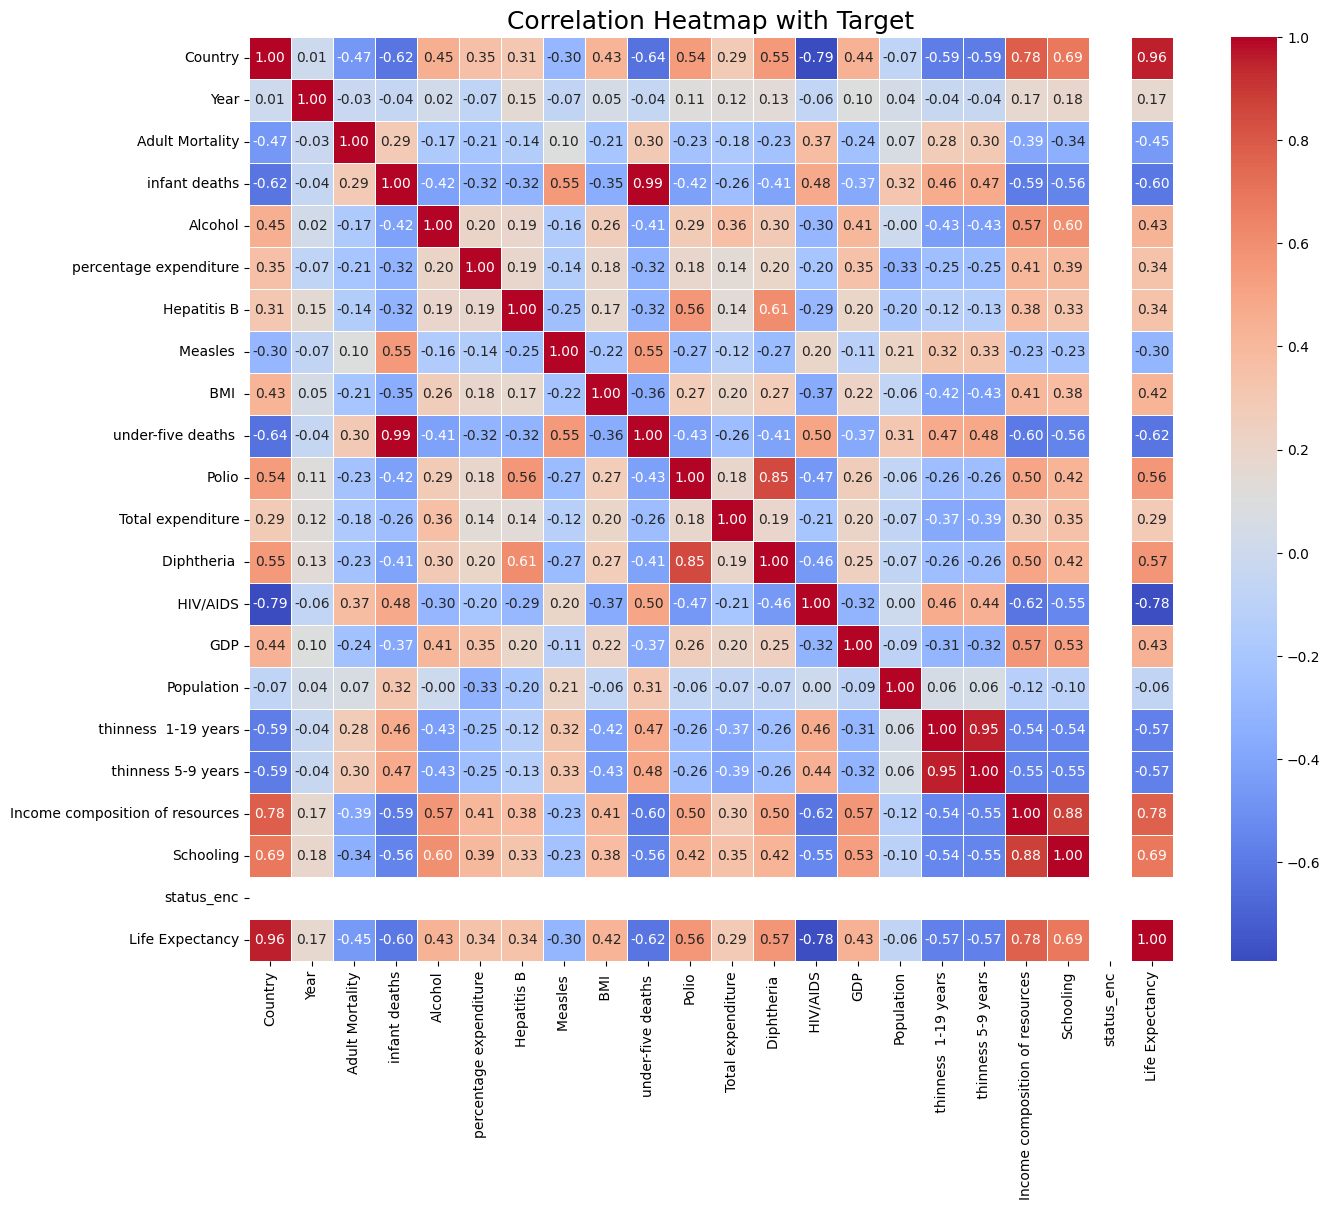

In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target
df_corr = pd.concat([x_train_knn, y_train.rename('Life Expectancy')], axis=1)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,      # Show correlation values
    fmt=".2f",       # 2 decimal places
    cmap="coolwarm", # Color map
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap with Target", fontsize=18)
plt.show()


In [379]:

# Step 3 Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(x_train_knn,y_train) # training of linear regression
y_predict=LR.predict(x_test_knn)

In [380]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)
r2score

0.9311908878111711

In [381]:
adjusted_r2 = 1-(1-0.90)*(40-3)/(40-3-1)
adjusted_r2

0.8972222222222223

In [382]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

6.636990659945057
2.5762357539528593


In [383]:
print(mean_absolute_error(y_test,y_predict))

1.7241837675980578


In [113]:
continuous_cols = continuous_cols.pop(0)

In [384]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have your trained model: model
# and your training/test data: X_train, y_train, X_test, y_test

# Predictions
y_train_pred = LR.predict(x_train_knn)
y_test_pred = LR.predict(x_test_knn)

# Metrics function
def regression_metrics(y_true, y_pred, dataset_name="Dataset"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"📊 {dataset_name} Metrics:")
    print(f"R²       : {r2:.3f}")
    print(f"MSE      : {mse:.3f}")
    print(f"RMSE     : {rmse:.3f}")
    print(f"MAE      : {mae:.3f}\n")
    return mse, rmse, mae, r2

# Calculate metrics
train_metrics = regression_metrics(y_train, y_train_pred, "Training Set")
test_metrics = regression_metrics(y_test, y_test_pred, "Test Set")

# Check for overfitting/underfitting
if train_metrics[3] > test_metrics[3] + 0.05:
    print("⚠️ Possible overfitting: Training R² much higher than Test R²")
elif train_metrics[3] < 0.7 and test_metrics[3] < 0.7:
    print("⚠️ Possible underfitting: Both Training and Test R² are low")
else:
    print("✅ Model seems well-fitted")


📊 Training Set Metrics:
R²       : 0.947
MSE      : 4.657
RMSE     : 2.158
MAE      : 1.462

📊 Test Set Metrics:
R²       : 0.931
MSE      : 6.637
RMSE     : 2.576
MAE      : 1.724

✅ Model seems well-fitted
